## Массивы `NumPy`

Обнаружение гравитационных волн с помощью NumPy: https://numpy.org/case-studies/gw-discov/ \
Первая фотография черной дыры с помощью NumPy: https://numpy.org/case-studies/blackhole-image/

<img src="https://numpy.org/images/content_images/cs/bh_numpy_role.png">

### Базовые операции с массивами

Сегодня мы познакомимся с библиотекой `NumPy` (сокращение от *Numeric Python*), которая часто используется в задачах, связанных с машинным обучением.

Чтобы мы смогли на конкретных примерах увидеть, зачем эта библиотека используется, давайте её импортируем. Если вы уже устанавливали Anaconda, то библиотека `numpy` также была установлена на ваш компьютер. Проверим: импортируем библиотеку с сокращённым названием, так часто делают, чтобы не «таскать» за собой в коде длинное название. Сокращение `np` для библиотеки `numpy` – распространённое, можно даже сказать, общепринятое, его часто можно увидеть в документации или официальных тьюториалах.

In [1]:
import numpy as np

Возможности:
   - поддержка многомерных массивов (включая матрицы);
   - поддержка высокоуровневых математических функций, предназначенных для работы с многомерными массивами.  
    
Так же numpy лежит в основе датафреймов pandas, и многие вещи (фильтрация, индексирование, математические операции), которые обсудим в этом уроке, потом транслируются в pandas.

# Массивы Ndarray

Основыным объектом `numpy` является Ndarray – это n-мерный массив (сокращение от *n-dimensional array*), структура данных, которая позволяет хранить набор элементов одного типа: либо только целые числа, либо числа с плавающей точкой, либо строки, либо булевы (логические) значения. 

Производить вычисления с массивами гораздо быстрее и эффективнее, чем со списками.

Массивы могут быть одномерными, то есть визуально ничем не отличаться от простого списка значений.


In [3]:
a = [1, 2, 3]
b = [4, 5, 6]

In [9]:
a

[1, 2, 3]

In [4]:
a + b

[1, 2, 3, 4, 5, 6]

In [6]:
a * 3

[1, 2, 3, 1, 2, 3, 1, 2, 3]

In [7]:
aa = np.array(a)
bb = np.array(b)

In [10]:
aa

array([1, 2, 3])

In [11]:
bb

array([4, 5, 6])

In [13]:
aa + bb

array([5, 7, 9])

In [15]:
aa * 2

array([2, 4, 6])

In [16]:
np.array([0, 2, 3, 4])

array([0, 2, 3, 4])

А могут быть многомерными (n-мерными), то есть представлять собой вложенный список («список списков»):

In [17]:
np.array([[1, 2], 
          [1, 0]])  # двумерный

array([[1, 2],
       [1, 0]])

Или даже «список таблиц»:

In [18]:
x = np.array([[[6, 3],
        [6, 8]],
      [[1, 100],
        [0, 1]]])  # трехмерный

In [19]:
x

array([[[  6,   3],
        [  6,   8]],

       [[  1, 100],
        [  0,   1]]])

In [23]:
x[0]

array([[6, 3],
       [6, 8]])

In [24]:
x[0][1]

array([6, 8])

In [25]:
x[0][1][1]

8

In [26]:
x[1][0][1] # вторая колонка первой строки второго измерения

100

Мы чаще всего будем работать с двумерными массивами. Про двумерный массив можно думать как про матрицу или про таблицу. Так, массив во втором примере выше можно рассматривать как таблицу, состояшую из двух строк и трёх столбцов, как таблицу $2 \times 3$ (сначала указывается число строк, затем – число столбцов). Отсюда следует важный факт: число элементов в списках внутри массива должно совпадать. Проверим на примере – возьмём списки разной длины, то есть списки, состоящие из разного числа элементов, и объединим их в массив:

In [19]:
lst = [[0, 0, 1],
         [0, 1]]
lst

[[0, 0, 1], [0, 1]]

In [27]:
np.array([[0, 0, 1],
         [0, 1]]) 

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

Получилось что-то немного странное. Никакой ошибки Python не выдал, но воспринимать этот объект как полноценный массив он уже не будет!

Теперь давайте посмотрим, что будет, если мы попробуем объединить в массив объекты разных типов, например, целые числа и числа с плавающей точкой:

In [28]:
np.array([[5, 8.2], 
         [1.2, 1]])
# все стали типа float

array([[5. , 8.2],
       [1.2, 1. ]])

In [29]:
np.array([[5, 8.2], 
         [1.2, 'ba']])
# все стали типа строки

array([['5', '8.2'],
       ['1.2', 'ba']], dtype='<U32')

In [30]:
q = np.array([[1, 2],
             [3, 4]])

w = np.array([[5, 6], 
             [7, 8]])

In [31]:
print(q + w)

[[ 6  8]
 [10 12]]


Все элементы были автоматически приведены к одному типу (можно считать, что тип *float* «сильнее» типа *integer*). 

# Массивы ndarray и операции с ними

Наиболее важные атрибуты объектов ndarray:
1. **`ndarray.ndim`** - число измерений (чаще их называют "оси") массива.
  
2. **`ndarray.shape`** - размеры массива, его форма. Это кортеж натуральных чисел, показывающий длину массива по каждой оси. Для матрицы из n строк и m столбов, shape будет (n,m). Число элементов кортежа shape равно ndim.
3. **`ndarray.size`** - количество элементов массива. Очевидно, равно произведению всех элементов атрибута shape.
4. **`ndarray.dtype`** - объект, описывающий тип элементов массива. Можно определить dtype, используя стандартные типы данных Python. Можно хранить и numpy типы, например: bool, int16, int32, int64, float16, float32, float64, complex64


строки - это наблюдения
а второе это элементы

In [ ]:
а

Двумерный массив

In [32]:
M = np.array([[2, 5], 
              [6, 8], 
              [1, 3]])
M

array([[2, 5],
       [6, 8],
       [1, 3]])

In [33]:
M.dtype

dtype('int32')

Массивы бывают многомерными, значит, у массива есть число измерений. Давайте его найдём:

In [35]:
M.ndim  # dimensions

2

Действительно, всего два измерения: чтобы указать на число 5 из этого массива, нам понадобятся всего две координаты – номер строки и номер столбца. Теперь посмотрим на форму или вид массива (*shape*):

In [39]:
M.shape  # 3 строки и 2 столбца, т.е. 3 списка по 2 элемента

(3, 2)

Кроме того, можем найти общее число элементов в массиве, его длину, размер (*size*):

In [29]:
M.size  # всего 6 элементов

6

### Работа с элементами массива

Если нам нужно обратиться к элементам массива, то эта операция будет похожа на работу со вложенными списками:

In [40]:
M

array([[2, 5],
       [6, 8],
       [1, 3]])

In [41]:
M[0]  # весь первый список в M

array([2, 5])

In [42]:
M[0][1]  # второй элемент первого списка в M

5

Или не совсем как со списками, без двойных скобок:

In [43]:
M[0, 1]

5

Ещё можно выбирать сразу несколько элементов массива. Для этого воспользуемся срезами (*slices*):

In [44]:
M[0:2]  # с элемента с индексом 0 до элемента с индексом 1 включительно

array([[2, 5],
       [6, 8]])

Обратите внимание: правый конец среза не включается.

Концы среза можно опускать, если нас интересуют все элементы, начиная с некоторого элемента и до конца массива или начиная с первого элемента массива и до некоторого элемента (правый конец точно так же включаться не будет):

In [45]:
M

array([[2, 5],
       [6, 8],
       [1, 3]])

In [46]:
M[1:] # с элемента с индексом 1 до конца

array([[6, 8],
       [1, 3]])

In [47]:
M[:2] # с начала массива до элемента с индексом 1 включительно

array([[2, 5],
       [6, 8]])

Кроме того, при выборе элементов можно выставлять шаг. По умолчанию мы выбираем все элементы подряд, шаг равен 1, но это можно изменить:

In [48]:
M[0:3:2]  # с нулевого по третий через 2

array([[2, 5],
       [1, 3]])

Концы среза по-прежнему можно опускать:

In [49]:
M[::2]

array([[2, 5],
       [1, 3]])

Или сделать более интересную вещь, взять отрицательный шаг и выбрать все элементы в обратном порядке, с конца:

In [50]:
M

array([[2, 5],
       [6, 8],
       [1, 3]])

In [51]:
M[::-1]

array([[1, 3],
       [6, 8],
       [2, 5]])

### Ещё про операции с массивами

Теперь посмотрим на другие операции с массивами. Создадим простой одномерный массив, содержащий оценки группы школьников:

In [52]:
marks = np.array([5, 4, 3, 5, 5, 4, 3, 4]) 
marks

array([5, 4, 3, 5, 5, 4, 3, 4])

Найдем самую плохую, минимальную оценку:

In [53]:
marks.min()

3

А теперь самую высокую, максимальную:

In [54]:
marks.max()

5

И средний балл:

In [55]:
marks.mean()

4.125

Медиану мы так не найдём — нет метода `median()`, но зато есть такая функция:

In [57]:
np.median(marks)

4.0

In [59]:
M

array([[2, 5],
       [6, 8],
       [1, 3]])

In [60]:
np.median(M)

4.0

А теперь найдем номер ученика с самой высокой оценкой:

In [61]:
marks

array([5, 4, 3, 5, 5, 4, 3, 4])

In [62]:
marks.max()

5

In [63]:
#выдает индекс первого вхождения максимального значения
marks.argmax()

0

И номер ученика с самой низкой оценкой:

In [64]:
marks.min()

3

In [65]:
marks.argmin()

2

**Внимание:** если таких несколько, будет выведено первое совпадение, как для `argmin()`, так и для`argmax()`.

Конечно, мы не сможем сейчас рассмотреть все доступные методы, относящиеся к массивам (некоторые часто используемые методы мы еще будем обсуждать в следующем модуле), но при желании на перечень доступных методов можно посмотреть, набрав название массива, поставив точку и нажав на *Tab* (показать).

In [66]:
marks.

SyntaxError: invalid syntax (1350698145.py, line 1)

Теперь посмотрим на многомерный массив, для удобства возьмём двумерный:

In [77]:
grades = np.array([[3, 5, 5, 4, 3], 
                   [3, 3, 4, 3, 3], 
                   [9, 5, 5, 4, 5]])

In [72]:
grades.min()

3

In [ ]:
1 - строки
0 - столбцы (колонки)

In [73]:
grades.min(axis=1)

array([3, 3, 4])

In [74]:
grades.min(axis=0)

array([3, 3, 4, 3, 3])

In [75]:
grades.max()

5

In [78]:
#собитрает все как в одну строчку как в один список и выдает индекс прям попроядку
grades.argmax()

10

In [80]:
grades.argmax(axis=1)

array([1, 2, 0], dtype=int64)

Пусть это будут оценки трёх студентов 5 контрольных работ. Попробуем теперь найти средний балл за контрольные по каждой группе. Для этого необходимо указать, по какому измерению мы будем двигаться (грубо говоря, по строкам или столбцам):

In [81]:
grades.mean(axis = 1) # по строкам, три оценки - одна для каждого студента

array([4. , 3.2, 5.6])

А теперь найдем средний балл по каждой контрольной работе:

In [82]:
grades.mean(axis = 0) # по столбцам, пять оценок - одна для каждой работы

array([5.        , 4.33333333, 4.66666667, 3.66666667, 3.66666667])

Таким же образом можно было посмотреть на минимальное и максимальное значение (можете потренироваться самостоятельно).

### Создание массивов

#### Как создать массив?

**Способ 1**

С первым способом мы уже отчасти познакомились: можно получить массив из готового списка, воспользовавшись функцией `array()`:

In [83]:
np.array([10.5, 45, 2.4])

array([10.5, 45. ,  2.4])

**Способ 2**

Можно создать массив на основе промежутка, созданного с помощью `arange()` – функции `numpy`, похожей на стандартный `range()`, только более гибкую. Посмотрим, как работает эта функция.

In [84]:
np.arange(2, 9) # по умолчанию шаг равен 1, как обычный range()

array([2, 3, 4, 5, 6, 7, 8])

По умолчанию эта функция создает массив, элементы которого начинаются со значения 2 и заканчиваются на значении 8 (правый конец промежутка не включается), следуя друг за другом с шагом 1. Но этот шаг можно менять:

In [85]:
np.arange(2, 9, 3) # с шагом 3

array([2, 5, 8])

И даже делать дробным!

In [86]:
np.arange(2, 9, 0.5)

array([2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ,
       8.5])

Или создать массив из диапазона значений [start, stop] с заданием количества точек.

In [87]:
m = np.linspace(0, 10, 7)
m

array([ 0.        ,  1.66666667,  3.33333333,  5.        ,  6.66666667,
        8.33333333, 10.        ])

**Способ 3**

Еще массив можно создать совсем с нуля. Единственное, что нужно четко представлять – это его размерность, его форму, то есть опять же, число строк и столбцов. Библиотека `numpy` позволяет создать массивы, состоящие из нулей или единиц, а также  «пустые» массивы (на практике используются редко). Удобство заключается в том, что сначала можно создать массив, инициализировать его (например, заполнить нулями), а затем заменить нули на другие значения в соответствии с требуемыми условиями.

Так выглядит массив из нулей:

In [89]:
# (3 строки, 3 столбца, не поняла(3 вектора?))
Z = np.zeros((3, 3, 3)) # размеры в виде кортежа - не теряйте еще одни круглые скобки
Z

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [90]:
np.zeros((5, 2))

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [91]:
# создание вектора из нулей
v = np.zeros(4)
v

array([0., 0., 0., 0.])

А так – массив из единиц:

In [92]:
O = np.ones((4, 2))
O

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

А так выглядит единичная матрица – таблица из 0 и 1, в которой число строк и столбцов одинаково, и где на главной диагонали стоят 1:

In [93]:
E = np.eye(5)
E

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

### Создайте матрицу 5x5 со значениями строк в диапазоне от 0 до 4

In [94]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [96]:
m = np.zeros((5, 5))
print(m)
print()
m += np.arange(5)
print(m)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]


**Способ 4**

Создание массива случайных чисел.

В `numpy` есть аналог модуля `random` - `numpy.random`.

In [100]:
np.random.rand(1, 1)

array([[0.75101761]])

In [111]:
np.random.seed(42) # фиксация случайности 
np.random.rand(5, 2)

array([[0.37454012, 0.95071431],
       [0.73199394, 0.59865848],
       [0.15601864, 0.15599452],
       [0.05808361, 0.86617615],
       [0.60111501, 0.70807258]])

In [112]:
# массив чисел из равномерного (uniform) распределения в диапазоне [0, 1)
# np.random.rand(d0, d1, d3, ...) d0, d1,... - pазмеры возвращаемого массива
np.random.seed(42)
print(np.random.rand(2, 2))
print(np.random.rand(2, 2).shape)

[[0.37454012 0.95071431]
 [0.73199394 0.59865848]]
(2, 2)


In [113]:
# массив чисел из стандартного нормального (norm) распределения
np.random.randn(2, 3, 2) 
# print(np.random.randn(2, 3, 2).shape)

array([[[ 1.57921282,  0.76743473],
        [-0.46947439,  0.54256004],
        [-0.46341769, -0.46572975]],

       [[ 0.24196227, -1.91328024],
        [-1.72491783, -0.56228753],
        [-1.01283112,  0.31424733]]])

In [114]:
a = np.array([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1])

In [115]:
a

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

(128, 128, 3)


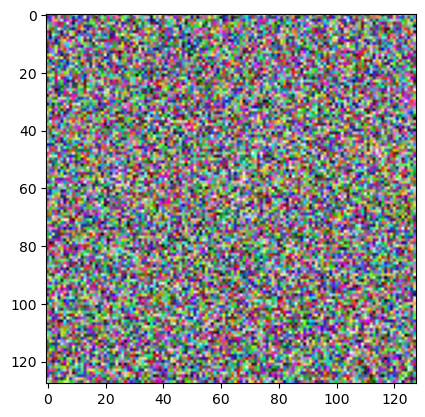

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline

noise = np.random.random((128,128,3))
print(noise.shape)
plt.imshow(noise);

In [117]:
from scipy import misc

C:\Users\USER_LENA\AppData\Local\Temp\ipykernel_9568\3425079807.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  img = misc.face()


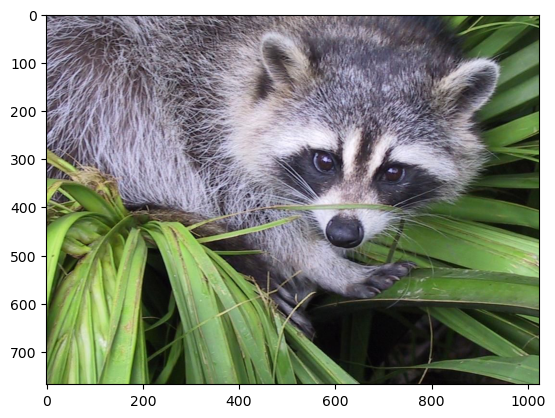

In [119]:
img = misc.face()
plt.imshow(img);

In [120]:
img

array([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165],
        ...,
        [119, 126,  74],
        [131, 136,  82],
        [139, 144,  90]],

       [[ 89,  82, 100],
        [110, 103, 121],
        [130, 122, 143],
        ...,
        [118, 125,  71],
        [134, 141,  87],
        [146, 153,  99]],

       [[ 73,  66,  84],
        [ 94,  87, 105],
        [115, 108, 126],
        ...,
        [117, 126,  71],
        [133, 142,  87],
        [144, 153,  98]],

       ...,

       [[ 87, 106,  76],
        [ 94, 110,  81],
        [107, 124,  92],
        ...,
        [120, 158,  97],
        [119, 157,  96],
        [119, 158,  95]],

       [[ 85, 101,  72],
        [ 95, 111,  82],
        [112, 127,  96],
        ...,
        [121, 157,  96],
        [120, 156,  94],
        [120, 156,  94]],

       [[ 85, 101,  74],
        [ 97, 113,  84],
        [111, 126,  97],
        ...,
        [120, 156,  95],
        [119, 155,  93],
        [118, 154,  92]]

In [122]:
img2 = img//2

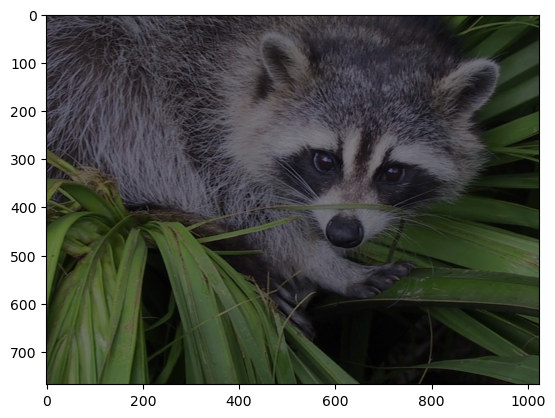

In [124]:
plt.imshow(img2);

### Изменение размерности списков

Вспомним, что у нас есть массив оценок студентов `grades`:

In [125]:
grades

array([[3, 5, 5, 4, 3],
       [3, 3, 4, 3, 3],
       [9, 5, 5, 4, 5]])

Как поменять структуру массива так, чтобы, например, оценки были записаны группами по три оценки? Воспользоваться методом `.reshape()`, который позволяет поменять форму массива.

In [126]:
grades.reshape(5, 3)

array([[3, 5, 5],
       [4, 3, 3],
       [3, 4, 3],
       [3, 9, 5],
       [5, 4, 5]])

In [128]:
grades.reshape(5, -1) # -1 позволяет "пропустить" один из параметров, тогда сам высчитает

array([[3, 5, 5],
       [4, 3, 3],
       [3, 4, 3],
       [3, 9, 5],
       [5, 4, 5]])

In [129]:
grades.reshape(-1, 3)

array([[3, 5, 5],
       [4, 3, 3],
       [3, 4, 3],
       [3, 9, 5],
       [5, 4, 5]])

In [130]:
grades.reshape(5, 4)

ValueError: cannot reshape array of size 15 into shape (5,4)

Теперь массив двумерный, и чтобы обратиться к элементу массива, нам нужно указывать две вещи: индекс списка и индекс элемента в этом списке. Метод `.reshape()` удобен, но при его использовании стоит помнить, что не любой массив можно превратить в массив другой формы – общее число элементов в массиве должно позволять получить новое число списков и элементов в них. Так, массив `grades`, в котором всего 15 элементов, нельзя превратить в массив вида `(2, 8)` (таблица $2 \times 8$), потому что для такой формы понадобится 16 элементов! И Python явно об этом сообщит:

In [131]:
grades.reshape(2, 8)

ValueError: cannot reshape array of size 15 into shape (2,8)

Если нам нужно просто поменять местами строки и столбцы в таблице, то есть списки в массиве, можно воспользоваться транспонированием, которое осуществляется в `NumPy` с помощью метода `.transpose()`:

In [132]:
grades

array([[3, 5, 5, 4, 3],
       [3, 3, 4, 3, 3],
       [9, 5, 5, 4, 5]])

In [133]:
grades.transpose() 

array([[3, 3, 9],
       [5, 3, 5],
       [5, 4, 5],
       [4, 3, 4],
       [3, 3, 5]])

Кроме того, в противоположность `.reshape()`, который часто используется для разбиения одномерного массива на многомерный из нескольких маленьких списков, в `NumPy` существует «обратный» метод `.ravel()`, который позволяет любой многомерный массив превратить в одномерный, состоящий из одного списка, другими словами, сделать массив «плоским»:

In [134]:
grades

array([[3, 5, 5, 4, 3],
       [3, 3, 4, 3, 3],
       [9, 5, 5, 4, 5]])

In [135]:
grades.ravel()

array([3, 5, 5, 4, 3, 3, 3, 4, 3, 3, 9, 5, 5, 4, 5])

*Примечание:* в `NumPy` есть ещё другой метод для создания «плоских» массивов – `flatten()`.

In [136]:
grades.flatten()

array([3, 5, 5, 4, 3, 3, 3, 4, 3, 3, 9, 5, 5, 4, 5])

### Проверка условий на массивах

Давайте посмотрим, каким образом можно проверять условия на массивах и отбирать элементы по условию. Создадим массив со значениями возраста:

In [137]:
ages = np.array([[15, 23, 32, 45, 52], 
               [68, 34, 55, 78, 20], 
               [25, 67, 33, 45, 14]])

Давайте попробуем узнать, какие значения массива соответствуют людям трудоспособного возраста: от 16 лет и старше:

In [138]:
ages >= 16  # больше или равно

array([[False,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True, False]])

Все элементы, кроме первого в первом списке и кроме последнего в последнем списке: на всех позициях, кроме указанных, стоят значения `True`, что означает, что условие выполняется. То, что мы получили сейчас – это булев массив, массив, состоящий из булевых (логических) значений, значений `True` и `False`. 

Теперь попробуем сформулировать более сложное условие: проверим, какие элементы соответствуют людям старше 18, но младше 60 лет:

In [140]:
(ages > 18) & (ages < 60) # & - одновременное условие

array([[False,  True,  True,  True,  True],
       [False,  True,  True, False,  True],
       [ True, False,  True,  True, False]])

Как посчитать, сколько элементов массива удовлетворяют некоторым условиям?

Суммируем значения по всему массиву: Python понимает, что значение `True` – это 1, а `False` – это 0, поэтому нет необходимости превращать все значения в числовые, мы можем просто сложить все «единички»:

In [141]:
((ages > 18) & (ages < 60)).sum()

10

In [142]:
ages.size

15

А теперь проверим, какие значения соответствуют людям либо младше 18, либо старше 60:

In [143]:
print(((ages < 18) | (ages > 60)).sum())  # | - или - хотя бы одно условие верно

5


А как увидеть сами значения, которые удовлетворяют определенным условиям? Заключить условие в квадратные скобочки:

In [144]:
ages

array([[15, 23, 32, 45, 52],
       [68, 34, 55, 78, 20],
       [25, 67, 33, 45, 14]])

In [145]:
ages >= 16

array([[False,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True, False]])

In [146]:
ages[ages >= 16]

array([23, 32, 45, 52, 68, 34, 55, 78, 20, 25, 67, 33, 45])

In [148]:
ages[(ages >= 16) & (ages < 60)]

array([23, 32, 45, 52, 34, 55, 20, 25, 33, 45])

Внимание: не забудьте круглые скобки для каждого условия, иначе Python поймёт всё неправильно и вернёт ошибку:

In [149]:
ages[ages >= 16 & ages < 60]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### Запись списков в файл и чтение файлов со списками

Чтобы было проще работать, сначала обсудим запись списков, тем самым сохранив списки себе на компьютер, а потом будем загружать их в Python. Это удобно для хранения больших списков с данными + например, для сохранения результатов разных моделей.

Запишем массив `ages` в файл формата `.npy`: сначала укажем название файла, а затем – сам массив, который сохраняем.

In [150]:
import os
os.getcwd()

'C:\\Users\\USER_LENA\\Desktop\\DS_HSE\\DS_HSE_HW\\Lect_10 np, pd'

In [156]:
np.save("ages.npy", ages)
# не открывает файл не потому что кодировка дурацкая, а потому что вормат такой не поддерживается
# можно считать вот так

Теперь этот файл можно увидеть во вкладке *Home* в Jupyter Notebook, в рабочей папке. Попробуем выполнить обратную операцию: считаем массив из numpy-файла:

In [157]:
np.load("ages.npy")

array([[15, 23, 32, 45, 52],
       [68, 34, 55, 78, 20],
       [25, 67, 33, 45, 14]])

Выгружать списки можно в разные форматы. Например, можно просто сохранить массив в текстовый файл с расширением `.txt`:

In [158]:
np.savetxt("ages.txt", ages)

И аналогичным образом считать:

In [160]:
np.loadtxt("ages.txt")

array([[15., 23., 32., 45., 52.],
       [68., 34., 55., 78., 20.],
       [25., 67., 33., 45., 14.]])

Если нет необходимости работать с файлами, можем просто превратить массив в другой объект Python. Например, в обычный список:

In [161]:
ages.tolist()

[[15, 23, 32, 45, 52], [68, 34, 55, 78, 20], [25, 67, 33, 45, 14]]

In [162]:
list(ages)

[array([15, 23, 32, 45, 52]),
 array([68, 34, 55, 78, 20]),
 array([25, 67, 33, 45, 14])]

In [135]:
ages

array([[15, 23, 32, 45, 52],
       [68, 34, 55, 78, 20],
       [25, 67, 33, 45, 14]])

Или строку:

In [163]:
np.array2string(ages)

'[[15 23 32 45 52]\n [68 34 55 78 20]\n [25 67 33 45 14]]'

# Операции с векторами и матрицами в NumPy

#### Скалярное произведение векторов

Одно число = скаляр.
Несколько скаляров = вектор.
Несколько векторов = матрица.

In [164]:
a = np.array([3, 1, 5, 2])
b = np.array([2, 5, 2, 4])
# он поскалярно их умножает
# <a, b> = 3*2 + 1*5 + 5*2 + 2*4
print(a @ b)    # python 3 style
print(a.dot(b)) 
print(np.dot(a, b))

29
29
29


In [165]:
a = np.array([3, 1, 5, 2])
b = np.array([2, 5, 2, 4, 4])
print(a @ b)    # python 3 style

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 4)

#### Умножение матриц
  
Операция умножения определена для двух матриц, таких что число столбцов первой равно числу строк второй. 

Пусть матрицы $A$ и $B$ таковы, что $A \in \mathbb{R}^{n \times k}$ и $B \in \mathbb{R}^{k \times m}$.    
__Произведением__ матриц $A$ и $B$ называется матрица $C$, такая что 
$$c_{ij} = \sum_{r=1}^{k} a_{ir}b_{rj}$$, 
где  $c_{ij}$ — элемент матрицы $C$, стоящий на пересечении строки с номером $i$ и столбца с номером $j$.

<img src="https://habrastorage.org/webt/ou/_g/wg/ou_gwgmqlsqlzlelu93s1q7vetw.png" width=500>

In [166]:
a = np.array([[1, 2], [2, 0]])
b = np.array([[2, 5], [1, 3]])
# print(a)
# print(b)
print(a @ b)    # python 3 style
# print(a.dot(b)) 
# print(np.dot(a, b))

[[ 4 11]
 [ 4 10]]


In [167]:
a

array([[1, 2],
       [2, 0]])

In [168]:
b

array([[2, 5],
       [1, 3]])

In [ ]:
# c[0][0] = 1 * 2 + 2 * 1 = 4
# c[0][1] = 1 * 5 + 2 * 3 = 11
# c[1][0] = 2 * 2 + 0 * 1 = 4
# c[1][1] = 2 * 5 + 0 * 3 = 10

In [169]:
a

array([[1, 2],
       [2, 0]])

In [170]:
b

array([[2, 5],
       [1, 3]])

In [171]:
a = np.array([[1, 2], [2, 0]])
b = np.array([1, 2])
a @ b

array([5, 2])

**!!!Не путайте поокординатное умножение с матричным!!!**

In [144]:
print(a * b)

[[1 4]
 [2 0]]


#### Умножение матриц и векторов

<img src="https://dev.opera.com/articles/understanding-the-css-transforms-matrix/5.png">

In [172]:
m = np.array([[1, 2], [0, 1], [2, 4]])
print(m)
v = np.array([2, 5])
print("v = ",v)
m @ v

[[1 2]
 [0 1]
 [2 4]]
v =  [2 5]


array([12,  5, 24])

## Полезные фукнции и методы для работы с массивами



**1. Замена элементов по индексу**

In [176]:
np.put(a, ind=[0, 2], v=[-44, -55])
a

array([[-44,   2],
       [-55,   0]])

**2. Выделение массива по условию**

In [ ]:
очень похоже на listcomprehension

In [177]:
# замена элементов массива по условию: a if a < 0 else 0
np.where(a < 0, a, 0)

array([[-44,   0],
       [-55,   0]])

In [178]:
# выбор элементов по условию
a[np.where(a < 0)]

array([-44, -55])

**3. Сортировка**

In [179]:
a = np.array([3, 8, 9, 20, -2, 92, 0])

In [180]:
# сортировка
np.sort(a)

array([-2,  0,  3,  8,  9, 20, 92])

In [181]:
np.argsort(a)

array([4, 6, 0, 1, 2, 3, 5], dtype=int64)

**4. Any и All для сложных логических условий**

`Any` возвращает True, если хотя бы один элемент `True`   
`All` возвращает True, если все элементы `True`

In [182]:
any([True, True, False, True, False, False, False])

True

In [183]:
all([True, True, False, True, False, False, False])

False

In [184]:
# сравнение векторов
np.array([1, 1, 0, 0]) == np.array([1, 1, 0, 2])

array([ True,  True,  True, False])

In [185]:
all(np.array([1, 1, 0, 0]) == np.array([1, 1, 0, 2]))

False

In [186]:
any(np.array([1, 1, 0, 0]) == np.array([1, 1, 0, 2]))

True

## [Пример](https://www.oreilly.com/library/view/python-data-science/9781491912126/): Каков средний рост президентов США?

In [187]:
!head president_heights.csv

"head" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


Используем библиотеку Pandas для открытия и чтения файла. 

In [188]:
import pandas as pd
data = pd.read_csv('president_heights.csv')

In [189]:
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185 191 182]


In [190]:
heights.size

44

In [192]:
print("Средний рост:", heights.mean())
print("Стандартное отклонение:", heights.std())
print("Максимальный рост:", heights.max())
print("Минимальный рост:", heights.min())

Средний рост: 180.04545454545453
Стандартное отклонение: 6.983599441335736
Максимальный рост: 193
Минимальный рост: 163


In [193]:
# разделение на квартили (4 квартиля, которые вот получается разделены 3-мя точками (25, серединка(50) и 75))
print("25-й перцентиль:", np.percentile(heights, 25))
print("Медиана:", np.median(heights))
print("75-й перцентиль:", np.percentile(heights, 75))

25-й перцентиль: 174.75
Медиана: 182.0
75-й перцентиль: 183.5


In [194]:
import matplotlib.pyplot as plt
%matplotlib inline

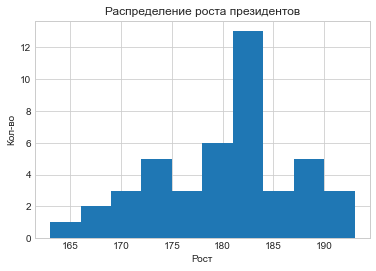

In [28]:
plt.hist(heights)
plt.title('Распределение роста президентов')
plt.xlabel('Рост')
plt.ylabel('Кол-во');